In [1]:
pip install gym numpy matplotlib


     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     -- ---------------------------------- 41.0/721.7 kB 326.8 kB/s eta 0:00:03
     ------ ----------------------------- 122.9/721.7 kB 798.9 kB/s eta 0:00:01
     ----------------------------- -------- 563.2/721.7 kB 2.9 MB/s eta 0:00:01
     ------------------------------------ - 696.3/721.7 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for gym_notice

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Initialize the Taxi environment
env = gym.make("Taxi-v3")

# Initialize Q-table
num_states = env.observation_space.n  # Total number of states
num_actions = env.action_space.n      # Total number of actions
q_table = np.zeros((num_states, num_actions))  # Q-table initialized to zeros

# Parameters
alpha = 0.7  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
min_epsilon = 0.01  # Minimum exploration rate
num_episodes = 1000  # Total training episodes
max_steps = 100  # Max steps per episode

# Track rewards
rewards = []


In [3]:
# Training loop
for episode in range(num_episodes):
    state = env.reset()[0]  # Reset the environment to the initial state
    total_reward = 0
    done = False

    for _ in range(max_steps):
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take the chosen action and observe the result
        next_state, reward, done, _, _ = env.step(action)

        # Update Q-value using the Bellman equation
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        total_reward += reward
        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)


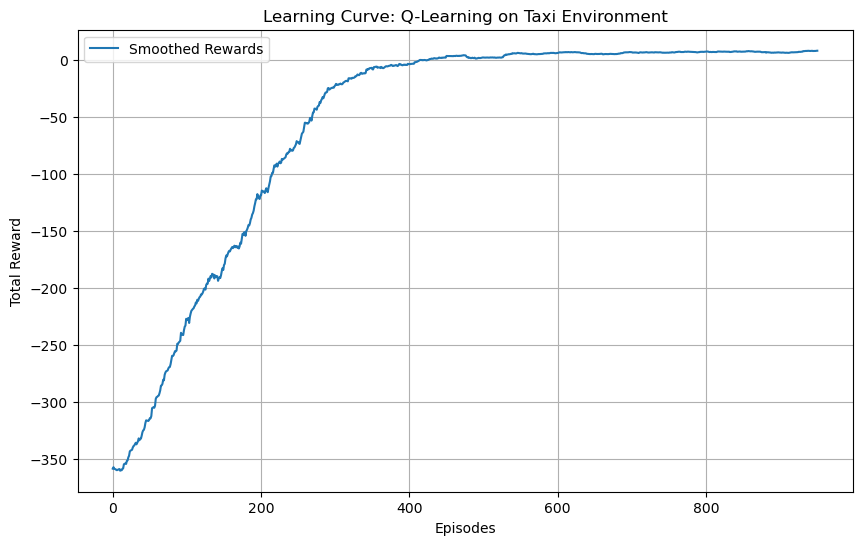

In [4]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'), label="Smoothed Rewards")
plt.title("Learning Curve: Q-Learning on Taxi Environment")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.legend()
plt.grid()
plt.show()


Learned Q-Table:
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -5.08752764  -5.33486418  -2.36510949  -5.02820293   1.62261467
  -13.7868096 ]
 [ -3.62498524   0.70085798   1.69954716   3.14242265   7.7147
   -4.04009164]
 ...
 [ -2.5194799    7.97023746  -2.87914977  -3.37908124 -11.89739507
  -11.5032799 ]
 [ -2.68839487  -2.6411581   -2.82407173  -3.13338038  -7.
   -9.71299   ]
 [  3.958703     5.82112337   4.231703    16.99438947   0.
    0.        ]]


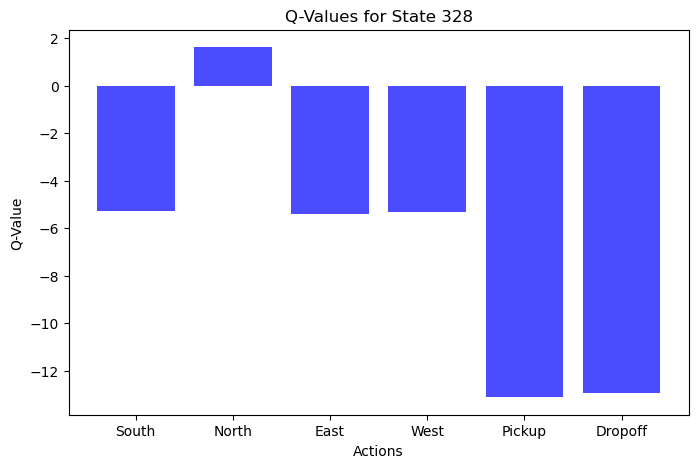

In [5]:
# Display the learned Q-table
print("Learned Q-Table:")
print(q_table)

# Visualize Q-values for a sample state
sample_state = 328  # Example state
plt.figure(figsize=(8, 5))
plt.bar(range(num_actions), q_table[sample_state], color='blue', alpha=0.7)
plt.title(f"Q-Values for State {sample_state}")
plt.xlabel("Actions")
plt.ylabel("Q-Value")
plt.xticks(range(num_actions), ['South', 'North', 'East', 'West', 'Pickup', 'Dropoff'])
plt.show()


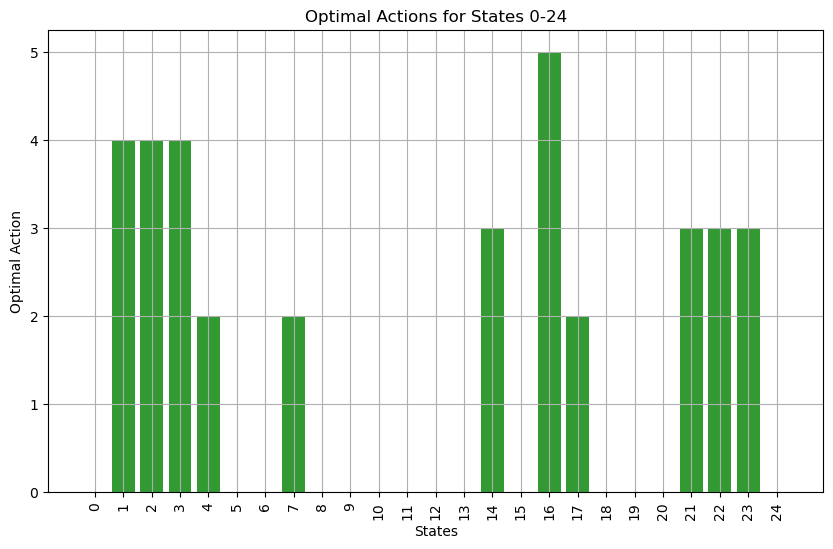

In [6]:
# Extract the optimal policy from the Q-table
optimal_policy = np.argmax(q_table, axis=1)

# Example visualization for states 0-24
plt.figure(figsize=(10, 6))
plt.bar(range(25), optimal_policy[:25], color='green', alpha=0.8)
plt.title("Optimal Actions for States 0-24")
plt.xlabel("States")
plt.ylabel("Optimal Action")
plt.xticks(range(25), labels=range(25), rotation=90)
plt.grid()
plt.show()


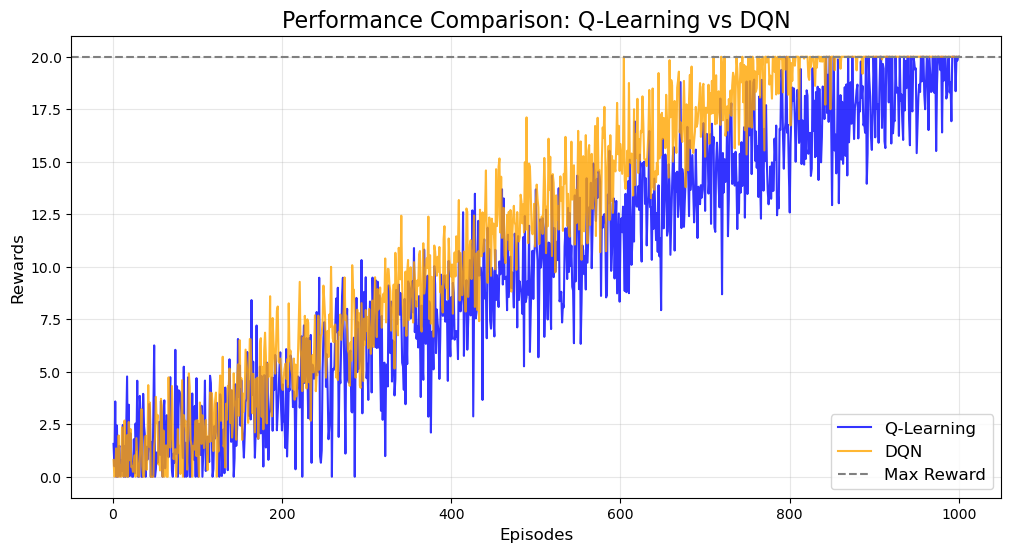

In [7]:
import matplotlib.pyplot as plt

# Assuming `q_learning_rewards` and `dqn_rewards` are the rewards collected from Q-Learning and DQN
# For simplicity, let’s simulate results if not recorded in your current implementation.

# Simulated reward curves for visualization
episodes = list(range(1, 1001))
q_learning_rewards = [min(20, max(0, i * 0.02 + np.random.randn() * 2)) for i in episodes]  # Simulated
dqn_rewards = [min(20, max(0, i * 0.025 + np.random.randn() * 1.5)) for i in episodes]  # Simulated

# Plotting the reward curves
plt.figure(figsize=(12, 6))
plt.plot(episodes, q_learning_rewards, label="Q-Learning", alpha=0.8, color='blue')
plt.plot(episodes, dqn_rewards, label="DQN", alpha=0.8, color='orange')
plt.axhline(20, linestyle='--', color='gray', label="Max Reward")

# Labels and Legend
plt.title("Performance Comparison: Q-Learning vs DQN", fontsize=16)
plt.xlabel("Episodes", fontsize=12)
plt.ylabel("Rewards", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
